# Data Analysis Overview

## Description

Put a really interesting description in here...

### Seaborn Google Colab Information
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=iwNOQzNj9aC9

In [1]:
# Importing packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()

import pickle
import datetime
import time

# Importing The Scraped Data and Saving Each Dictionary to a DataFrame

In [7]:
dataFrameList = []
years = [2019, 2018, 2017, 2016, 2015, 2014, 2013]
for year in years:
  # Importing the elite data
  with open('data\scrape_' + str(year) + '_ELIT.pkl', 'rb') as handle:
    vars()['data' + str(year) + 'elite'] = pd.DataFrame.from_dict(pickle.load(handle))
  dataFrameList.append('data' + str(year) + 'elite')

years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
for year in years:
  # Importing the mass data
  with open('data\scrape_' + str(year) + '_MASS.pkl', 'rb') as handle:
    vars()['data' + str(year) + 'mass'] = pd.DataFrame.from_dict(pickle.load(handle))
  dataFrameList.append('data' + str(year) + 'mass')

print(dataFrameList)

['data2019elite', 'data2018elite', 'data2017elite', 'data2016elite', 'data2015elite', 'data2014elite', 'data2013elite', 'data2019mass', 'data2018mass', 'data2017mass', 'data2016mass', 'data2015mass', 'data2014mass', 'data2013mass', 'data2012mass', 'data2011mass']


## Exploring The DataFrames

In [9]:
for dataset in dataFrameList:
  data = eval(dataset)
  print(data[0:1].Name) 
  #print(data[0:5].NewName)

0    ABDI, Bashir (BEL)
Name: Name, dtype: object
0    » ADOLA, Guye (ETH)\n
Name: Name, dtype: object
0    » ABERA, Tesfaye (ETH)\n
Name: Name, dtype: object
0    » Arter, Charlotte (GBR)\n
Name: Name, dtype: object
0    » Abeylegesse, Elvan (TUR)\n
Name: Name, dtype: object
0    » Abshero, Ayele (ETH)
Name: Name, dtype: object
0    » KEBEDE, Tsegaye (ETH)
Name: Name, dtype: object
0    \tKennedy, \tAimee (RSA)
Name: Name, dtype: object
0    » , Grace (GBR)\n
Name: Name, dtype: object
0    » (Cappelletti) Archer, Catherine (GBR)\n
Name: Name, dtype: object
0    » 17, Juan Cascales (GBR)\n
Name: Name, dtype: object
0    » Aarons, Elaine (GBR)\n
Name: Name, dtype: object
0    » , Harriet (GBR)
Name: Name, dtype: object
0    » Pollock, Paul (IRL)
Name: Name, dtype: object
0    » Kipsang, Wilson (KEN)
Name: Name, dtype: object
0    » Mutai, Emmanuel (KEN)
Name: Name, dtype: object


# Pre-Processing The DataFrames

## Splitting The Name Column into Name and Country

In [10]:
for dataset in dataFrameList:
  data = eval(dataset).Name
  country = []
  for index, value in data.items():
    newValue = value[value.find('(')+len('('):value.rfind(')')]
    if len(newValue) == 3:
      country.append(newValue)
    else:
      newValue = newValue[newValue.find('(')+len('('):]
      country.append(newValue)
  eval(dataset)['Country'] = country

In [11]:
for dataset in dataFrameList:
  data = eval(dataset).Name
  newName = []
  for index, value in data.items():
      newValue = value[value.find(',')+len(','):value.rfind('(')]
      newValue = newValue.rstrip()
      try:
        newValue = newValue.split()[0]
        newValue = newValue.rstrip()
      except:
        newValue = newValue
      newName.append(newValue) # need to drop second name
  eval(dataset)['First Name'] = newName

In [12]:
# archive -- could use this cell to drop the non-first name
for dataset in dataFrameList:
  data = eval(dataset).Name
  newName = []
  for index, value in data.items():
    try:
      value = value[value.find(next(filter(str.isalpha, value))):value.rfind('(')]
    except:
      value = value
    value = value.replace(" ", "")
    value = value.lower()
    newName.append(value)
  eval(dataset)['Name'] = newName

In [13]:
data2013mass.T

,0,1,2,3,4,5,6,7,8,9,...,34270,34271,34272,34273,34274,34275,34276,34277,34278,34279
Place (Overall),1,2,3,4,5,6,7,8,9,10,...,34271,34272,34273,34274,34275,34276,34277,34278,34279,34280
Place (Gender),1,2,3,4,5,6,7,8,9,10,...,12243,12244,12245,12246,22029,12247,12248,22030,12249,22031
Place (Category),1,2,3,4,5,6,7,8,9,10,...,7557,7558,7559,7560,12080,754,7561,12081,1329,241
Name,"pollock,paul","gilbert,john","houston,ross","kelly,james","molyneux,paul","couldwell,mark","spencer,stuart","vaughan,alun","tokumoto,kazuyoshi","gierjatowicz,patryk",...,"lieberman,yardenadaliah","abrahams,suzannekirsten","bradley,emma","bouskill,sarah","crean,davidandrew","cohen,debbie","smith,kelly","gadhvi,kurran","jones,michelelouise","singh,malkiat"
Runner Number,1088,797,640,809,1106,804,716,909,58188,907,...,43437,14239,19482,35567,49105,6229,40475,39389,18306,51328
Category,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,...,18-39,18-39,18-39,18-39,18-39,50-54,18-39,18-39,45-49,65-69
Half,01:06:13,01:08:16,01:09:38,01:09:38,01:09:38,01:11:28,01:11:28,01:11:28,01:11:12,01:12:28,...,,03:40:24,03:22:47,,03:28:40,03:55:54,,03:48:13,,
Finish,02:17:10,02:17:43,02:19:22,02:21:39,02:21:54,02:24:01,02:24:09,02:24:12,02:25:00,02:26:02,...,08:27:49,08:28:37,08:31:46,08:37:08,08:39:00,08:39:16,08:40:41,08:41:55,08:51:01,08:51:09
Club,KENT AC,Kent AC,Central AC,Belgrave Harriers,SPRINGFIELD & STRIDERS,Charnwood AC,Notts AC,Eryri Harriers,,Edinburgh University Hare And Hounds,...,,,,,,,,,,
Status,Finished,Finished,Finished,Finished,Finished,Finished,Finished,Finished,Finished,Finished,...,Finished,Finished,Finished,Finished,Finished,Finished,Finished,Finished,Finished,Finished


## Assigning Column Numbers to Data Types

In [14]:
integerColumnNumbers = [0,1,2,4]
categoricalColumnNumbers = [3,5,8,9,20]
datetimeColumnNumbers = [6,7,10,11,12,13,14,15,16,17,18,19]

# Checking references
print(data2019elite.iloc[:, integerColumnNumbers].T)
print(data2019elite.iloc[:, categoricalColumnNumbers].T)
print(data2019elite.iloc[:, datetimeColumnNumbers].T)

                               0                 1                2   \
Place (Overall)                 7                49               39   
Place (Gender)                  7                13               34   
Place (Category)                7                12               32   
Runner Number     Runner Number16  Runner Number109  Runner Number25   

                               3                 4                 5   \
Place (Overall)                20                55                 –   
Place (Gender)                 20                19                 –   
Place (Category)               20                18                 –   
Runner Number     Runner Number26  Runner Number122  Runner Number110   

                               6                 7                 8   \
Place (Overall)                 –                54                 –   
Place (Gender)                  –                18                 –   
Place (Category)                –                17   

## Converting Numeric Columns to Integers

In [15]:
for dataset in dataFrameList:
  thisData = eval(dataset)
  for columnNumber in integerColumnNumbers:
    eval(dataset).iloc[:, columnNumber] = thisData.iloc[:, columnNumber].apply(lambda x: ''.join(c for c in x if c.isdigit()))
    eval(dataset).iloc[:, columnNumber] = pd.to_numeric(thisData.iloc[:, columnNumber], downcast='integer')

In [16]:
# Check for NaN values in integer columns
checkerList = []
for dataset in dataFrameList:
  checkerRow = []
  for columnNumber in integerColumnNumbers:
    checkerRow.append(sum(eval(dataset).iloc[:, columnNumber].isna()))
  checkerList.append(checkerRow)

print(checkerList)

[[12, 12, 12, 0], [10, 10, 10, 0], [27, 27, 27, 0], [29, 29, 29, 0], [21, 21, 21, 0], [24, 24, 24, 0], [1, 1, 1, 0], [6758, 6758, 6758, 0], [7571, 7571, 7585, 0], [5873, 5873, 5875, 0], [6262, 6262, 6262, 0], [6144, 6144, 6170, 0], [5796, 5796, 5802, 0], [0, 0, 1, 0], [2, 2, 124, 0], [1, 1, 4, 0]]


## Convert Grouped Columns to Categories

In [ ]:
for dataset in dataFrameList:
  thisData = eval(dataset)
  for columnNumber in categoricalColumnNumbers:
    if columnNumber == 5:
      for index, value in eval(dataset).iloc[:, columnNumber].items():
        eval(dataset).iloc[index, columnNumber] = value.replace("Category", "")
    eval(dataset).iloc[:, columnNumber] = thisData.iloc[:, columnNumber].astype('category')

In [ ]:
checkerList = []
for dataset in dataFrameList:
  checkerRow = []
  for columnNumber in categoricalColumnNumbers:
    checkerRow.append(eval(dataset).iloc[:, columnNumber].cat.categories)
  checkerList.append(checkerRow)

print(checkerList[7])

[Index(['aabak,martin', 'aabak,sussi', 'aalders,steven', 'aaron,oghene',
       'aaronovitch,rosa', 'aas,groreinhardt', 'aas,janbilly',
       'aasen,anneweider', 'abali,zekiye', 'abarrateguiacha,mariadelcarmen',
       ...
       'zurano,benito', 'zwetsloot,chelsea', 'zwetsloot,daan', 'zwick,daniel',
       'zwiers,bert', 'zwinggi,christian', 'zwirek,stffan',
       'zycinski-singh,nicole', 'zywicki,dominic',
       'álvarezfernández ,juanvicente'],
      dtype='object', length=46927), Index(['18-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84'],
      dtype='object'), Index(['100 Marathon Club', '1485 Triathlon Club', '1610', '1ZER01 Athletes',
       '23 Mile Club', '26.2 Road Runners Club', '3M Gorseinon Road Runners',
       '3Ms Gorseinon', '605 Running Company', '9 92 running asd',
       ...
       'Zoom Tri Club Bournemouth', 'cus udine', 'fraserburgn Running club',
       'nike running club', 'north brooklyn runners', 'runblandford',

##Conver Time Columns to Datetime

In [ ]:
for dataset in dataFrameList:
  thisData = eval(dataset)
  for columnNumber in datetimeColumnNumbers:
    if columnNumber == 6:
      for index, value in eval(dataset).iloc[:, columnNumber].items():
        eval(dataset).iloc[index, columnNumber] = value.replace("Half", "")
    elif columnNumber == 7:
      for index, value in eval(dataset).iloc[:, columnNumber].items():
        eval(dataset).iloc[index, columnNumber] = value.replace("Finish", "")
    eval(dataset).iloc[:, columnNumber] = pd.to_datetime(thisData.iloc[:, columnNumber], format='%H:%M:%S', errors='coerce')

In [ ]:
checkerList = []
for dataset in dataFrameList:
  checkerRow = []
  for columnNumber in datetimeColumnNumbers:
    checkerRow.append(eval(dataset).iloc[:, columnNumber] )
  checkerList.append(checkerRow)

print(checkerList[9][0]) # checking finish times of first dataset

0     1900-01-01 01:57:03
1     1900-01-01 01:51:54
2     1900-01-01 01:59:06
3     1900-01-01 02:59:39
4     1900-01-01 01:37:43
              ...        
120   1900-01-01 02:58:13
121   1900-01-01 01:56:52
122   1900-01-01 01:59:40
123   1900-01-01 02:06:02
124   1900-01-01 02:24:43
Name: Half, Length: 125, dtype: datetime64[ns]


##Adding in Year of Race Column

In [ ]:
years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
for idx, dataset in enumerate(dataFrameList):
  dataSize = len(eval(dataset)['Status'])
  yearsArray = np.full(( dataSize, 1), years[idx])
  eval(dataset)["YearOfRace"] = yearsArray

In [ ]:
data2019mass.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Place (Overall),15969,22919,36124,34284,31241,NaN,5889,32248,11901,NaN,18961,20431,33729,6633,19478,13122,37858,NaN,24357,12894,36327,28228,37738,29396,23754,NaN,31584,11978,40646,29319,11932,18013,NaN,NaN,35705,42233,34595,NaN,28513,41334,...,8314,NaN,32522,8059,12655,21118,22382,14806,12695,13099,41973,8395,16350,15833,38936,42208,3981,NaN,NaN,12129,10518,10507,12455,18470,5304,37355,26125,29554,36088,9183,38449,34120,30017,9430,6971,21965,30709,26018,22771,NaN
Place (Gender),4405,15831,13720,21589,11053,NaN,963,20650,2994,NaN,5505,14344,12388,1176,13779,9681,14726,NaN,16620,9532,13829,9576,23095,19222,16276,NaN,20351,3029,16484,19187,8931,12847,NaN,NaN,13475,17570,12857,NaN,18779,24391,...,6551,NaN,20780,6380,3288,14769,6864,10850,9398,9662,24579,6603,11794,11484,23548,17552,3546,NaN,NaN,3093,8000,7993,3211,5330,4515,14433,17548,10257,22397,2048,15076,21518,19559,2143,5676,15288,19914,8524,15747,NaN
Place (Category),2309,2504,1222,3708,972,NaN,13,9803,459,NaN,823,2285,6509,752,6499,4562,7755,NaN,2953,4488,2335,5020,10886,3360,2568,NaN,3149,465,734,9105,1475,2338,NaN,NaN,7091,2908,6759,NaN,8906,4101,...,3079,NaN,9853,1241,1757,6993,1220,5120,935,4551,11477,1276,1172,558,11077,9283,1783,NaN,NaN,1663,1509,1506,1719,2781,450,7607,1769,1516,10561,1175,7937,3312,533,1219,574,2429,9461,4470,7446,NaN
Name,"kennedy,\taimee","aabak,martin","aabak,sussi","aalders,steven","aaron,oghene","aaronovitch,rosa","aas,groreinhardt","aas,janbilly","aasen,anneweider","abali,zekiye","abarrateguiacha,mariadelcarmen","abaurre,marcio","abbas,natasha","abbinante,annalisa","abblitt,jonathan","abbot,henry","abbott,amy","abbott,cali","abbott,craig","abbott,dave","abbott,donna","abbott,elizabeth","abbott,mark","abbott,nathan","abbott,neil","abbott,sam","abbott,simon","abbott,ursula","abbott-mccloud,lynn","abbotts,joel","abbud,rodrigo","abdallah,issa","abdulghani,muhamadsharizan","abdulhussain,abizer","abdul-kader,intisar","abdullah,khadijah","abdullah,nadia","abdullah,renata","abdullatif,rehan","abedeen,bobby",...,"abrams-cohen,michael","abrey,alexander","abrey,kieran","abrilgutierrez,alejandro","abrook,laura","absalom,james","absalonsen,karina","absolon,jonathan","abt,wilfried","abu,sadiq","abu-asi,mohammed","abu-khalil,attia","abubacker,talib","abudmanzano,ivanmitre","abukhshim,husam","aburrowsmith,josephine","abyazov,mikhail","acarnley,lisa","acason,lauren","accola,ursina","achacarcianoblejas,carlosenrique","achagarcianoblejas,ignacio","achilleos,stavria","achurch,emma","acierno,marco","acikel,tugba","acimov,dragan","ackerman,jude","ackery,david","ackland,corrie","ackrell,leanne","ackrill,craig","ackroyd,brian","ackroyd,kathryn","ackroyd,robert","acosta,eduardo","acott,simon","acton,georgie","acton,joe","acum,richard"
Runner Number,41065,70560,70559,46435,60365,28304,70441,70442,70480,70179,72103,72021,58423,69469,19481,10858,40242,28298,11505,6949,15371,37743,8128,4697,5988,50116,44261,13517,61430,39643,72030,20938,61927,61486,58152,10768,60313,20527,7052,52561,...,13134,43101,52049,11105,23803,52575,70566,56688,69431,35343,6143,53807,47416,72578,55185,43713,71637,36211,56002,58218,72120,72121,4490,24709,69468,43793,72637,43604,15866,53103,42765,52576,42473,71196,28133,71795,16313,46262,10230,10194
Category,18-39,45-49,50-54,40-44,50-54,18-39,55-59,18-39,45-49,45-49,45-49,45-49,18-39,18-39,18-39,18-39,18-39,18-39,40-44,18-39,40-44,18-39,18-39,40-44,45-49,40-44,45-49,45-49,55-59,18-39,45-49,40-44,18-39,45-49,18-39,40-44,18-39,18-39,18-39,40-44,...,18-39,18-39,18-39,40-44,18-39,18-39,40-44,18-39,50-54,18-39,18-39,40-44,50-54,55-59,18-39,18-39,18-39,18-39,18-39,18-39,40-44,40-44,18-39,18-39,50-54,18-39,50-54,45-49,18-39,18-39,18-39,45-49,60-64,18-39,50-54,45-49,18-39,18-39,18-39,50-54
Half,1900-01-

##Adding in Gender Column

In [ ]:
# Example using Genderize.io

import requests  # Import the requests library

# Query URL
url = ('https://api.genderize.io?name=ben')

print(url)

response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON
print(response.status_code)
print(payload['gender'])

https://api.genderize.io?name=ben
Request returned 200 : 'OK'
200
male


In [ ]:
for dataset in dataFrameList:
  thisData = eval(dataset).FirstName
  thisDataGender = []
  for index, value in thisData.items():
    url = ('https://api.genderize.io?name=' + value)
    response = requests.get(url)
    if response.status_code == 200:
      payload = response.json()
      thisDataGender.append(payload['gender'])
    else:
      print('stopValue = ' + str(index) + ' stopDataset = ' + dataset)
      break
  eval(dataset)['Gender'] = thisDataGender

  # put and if command in here to find out where the predictions stopped and continue day after day until data is complete
  

stopValue = 80 stopDataset = data2015mass


ValueError: ignored

In [ ]:
data2015elite.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
Place (Overall),NaN,35,34,4,NaN,NaN,NaN,14,37,NaN,28,16,30,NaN,NaN,7,17,NaN,27,18,22,8,3,1,31,25,2,NaN,NaN,NaN,6,NaN,19,10,NaN,32,20,29,NaN,24,NaN,11,NaN,33,13,NaN,15,5,9,NaN,39,36,12,38,26,NaN,23,21,NaN,NaN
Place (Gender),NaN,14,13,4,NaN,NaN,NaN,14,16,NaN,8,16,21,NaN,NaN,7,17,NaN,7,18,2,8,3,1,10,5,2,NaN,NaN,NaN,6,NaN,19,10,NaN,11,20,9,NaN,4,NaN,11,NaN,12,13,NaN,15,5,9,NaN,18,15,12,17,6,NaN,3,1,NaN,NaN
Place (Category),NaN,14,13,4,NaN,NaN,NaN,14,16,NaN,8,16,21,NaN,NaN,7,17,NaN,7,18,2,8,3,1,10,5,2,NaN,NaN,NaN,6,NaN,19,10,NaN,11,20,9,NaN,4,NaN,11,NaN,12,13,NaN,15,5,9,NaN,17,15,12,1,6,NaN,3,1,NaN,NaN
Name,"abeylegesse,elvan","aguilar,alessandra","arkhipova,tatyana","biwott,stanley","chabowski,marcin","cherono,elizeba","chesir,rebeccakangogo","cooray,anuradha","davies,mary","elmoukim,rkia","felix,anadulce","ferreira,hermano","fincioen,stijn","gamera,tetyana","girmalegesse,mert","guerra,javier","hynes,mathew","jepchirchir,peres","jeptoo,priscah","karayel,bekir","keitany,mary","kibrom,ghebre","kimetto,dennis","kipchoge,eliud","kiplagat,edna","kiplagat,florence","kipsang,wilson","kiptoo,edwin","kipyego,edwin","kirwa,wilfred","kitwara,samuel","kongin,boniface","kreienbuehl,christian","lebid,serhiy","lengurisi,loitarakwai","lewandowska,iwona","lizano,cesar","mazuronak,volha","mekonnen,tsegaye","mergia,aselefech","murgor,wilfred","mutai,emmanuel","mutai,geoffrey","nukuri,diane","overall,scott","partridge,susan","raymaekers,koen","regassa,tilahun","reunkov,aleksey","ribeiro,pedro","robinson,rebecca","samuels,sonia","shelley,michael","stepto,emma","sumgong,jemima","tsegay,samuel","tsegaye,tirfi","tufa,tigist","wanjiru,peter","zwama,paul"
Runner Number,118,114,111,9,15,133,132,23,117,115,112,21,26,110,24,19,27,131,105,20,102,14,2,4,101,104,1,41,42,44,7,48,22,12,45,116,25,122,8,103,43,3,5,119,17,134,16,10,13,28,123,120,18,121,108,11,106,109,47,46
Category,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,45-49,18-39,18-39,18-39,18-39,18-39,18-39
Half,1900-01-01 01:12:00,1900-01-01 01:12:20,1900-01-01 01:14:03,1900-01-01 01:02:20,NaT,1900-01-01 01:12:00,1900-01-01 01:11:39,1900-01-01 01:07:01,1900-01-01 01:14:37,NaT,1900-01-01 01:12:12,1900-01-01 01:04:48,1900-01-01 01:11:01,NaT,1900-01-01 01:07:56,1900-01-01 01:04:48,1900-01-01 01:07:01,1900-01-01 01:11:39,1900-01-01 01:11:43,1900-01-01 01:07:55,1900-01-01 01:11:43,1900-01-01 01:03:15,1900-01-01 01:02:20,1900-01-01 01:02:20,1900-01-01 01:11:44,1900-01-01 01:11:43,1900-01-01 01:02:20,NaT,1900-01-01 01:02:19,1900-01-01 01:03:15,1900-01-01 01:02:20,1900-01-01 01:07:01,1900-01-01 01:08:16,1900-01-01 01:04:48,1900-01-01 01:04:47,1900-01-01 01:12:00,1900-01-01 01:08:20,1900-01-01 01:14:03,1900-01-01 01:02:20,1900-01-01 01:11:42,1900-01-01 01:02:20,1900-01-01 01:02:20,1900-01-01 01:02:24,1900-01-01 01:12:00,1900-01-01 01:05:46,1900-01-01 01:14:34,1900-01-01 01:05:47,1900-01-01 01:02:20,1900-01-01 01:04:47,1900-01-01 01:07:56,1900-01-01 01:16:09,1900-01-01 01:14:37,1900-01-01 01:05:46,1900-01-01 01:16:44,1900-01-01 01:11:43,1900-01-01 01:02:20,1900-01-01 01:11:43,1900-01-01 01:11:43,1900-01-01 01:05:50,NaT
Finish,NaT,1900-01-01 02:29:45,1900-01-01 02:28:42,1900-01-01 02:06:41,NaT,NaT,NaT,1900-01-01 02:13:47,1900-01-01 02:34:22,NaT,1900-01-01 02:25:15,1900-01-01 02:15:53,1900-01-01 02:25:52,NaT,NaT,1900-01-01 02:09:33,1900-01-01 02:16:00,NaT,1900-01-01 02:25:01,1900-01-01 02:16:06,1900-01-01 02:23:40,1900-01-01 02:09:36,1900-01-01 02:05:51,1900-01-01 02:04:42,1900-01-01 02:27:16,1900-01-01 02:24:15,1900-01-01 02:04:47,NaT,NaT,NaT,1900-01-01 02:07:43,NaT,1900-01-01 02:1

##Adding in Athlete Type Column

In [ ]:
subDataFrameList = dataFrameList[0:-2]
print(subDataFrameList)

elite = "elite"
mass = "mass"
for dataset in subDataFrameList:
  athleteStatus = []
  if elite in dataset:
    dataSize = len(eval(dataset)['Status'])
    statusArray = np.full(( dataSize, 1), elite)
    eval(dataset)["AthleteType"] = statusArray
  elif mass in dataset:
    dataSize = len(eval(dataset)['Status'])
    statusArray = np.full(( dataSize, 1), mass)
    eval(dataset)["AthleteType"] = statusArray

['data2019elite', 'data2018elite', 'data2017elite', 'data2016elite', 'data2015elite', 'data2014elite', 'data2013elite', 'data2019mass', 'data2018mass', 'data2017mass', 'data2016mass', 'data2015mass', 'data2014mass', 'data2013mass']


In [ ]:
data2019elite.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
Place (Overall),7,49,39,20,55,NaN,NaN,54,NaN,37,35,25,57,NaN,41,15,26,22,36,45,43,5,50,8,2,16,21,10,34,48,51,52,38,1,12,NaN,4,32,40,24,30,NaN,47,19,31,17,NaN,53,NaN,46,9,27,14,13,44,56,23,42,33,18,NaN,29,6,28,NaN,NaN,NaN,11,3
Place (Gender),7,13,34,20,19,NaN,NaN,18,NaN,4,2,25,21,NaN,36,15,26,22,3,9,7,5,14,8,2,16,21,10,33,12,15,16,5,1,12,NaN,4,1,35,24,30,NaN,11,19,31,17,NaN,17,NaN,10,9,27,14,13,8,20,23,6,32,18,NaN,29,6,28,NaN,NaN,NaN,11,3
Place (Category),7,12,32,20,18,NaN,NaN,17,NaN,4,2,25,20,NaN,3,15,26,22,3,8,1,5,13,8,2,16,21,10,31,11,14,15,5,1,12,NaN,4,1,33,24,29,NaN,10,19,2,17,NaN,16,NaN,9,9,27,14,13,7,19,23,6,30,18,NaN,28,6,1,NaN,NaN,NaN,11,3
Name,"abdi,bashir","ando,yuka","arrospide,iraitz","ayala,derlis","barlow,tracy","bekele,tadelech","butter,michel","carruthers,hayley","charboneau,brittany","cherono,gladys","cheruiyot,vivian","clohisey,mick","cockram,natasha","costa,fredison","criniti,david","dasilva,danielchaves","davies,andy","debock,thomas","dereje,roza","dibaba,birhane","diver,sinead","farah,mo","fisikovici,lilia","gebresilasie,leul","geremew,mosinet","griffiths,dewi","griffiths,joshua","hawkins,callum","hehir,sean","huddle,molly","ichiyama,mao","jones,tish","keitany,mary","kipchoge,eliud","kipsang,wilson","kiptum,abraham","kitata,tolashura","kosgei,brigid","laerte,dennis","leak,colin","martelletti,paul","martin,jack","masai,linet","mellor,jonathan","o'hanlon,gary","olefirenko,ihor","osman,ahmed","partridge,lily","payne,tony","purdue,charlotte","rachik,yassine","rawat,nitendersingh","rayner,jack","robinson,brett","rocha,carlasalome","samuels,sonia","simpson,robbie","sisson,emily","suzuki,yohei","szost,henryk","tesfay,haftamnesh","tewelde,tsegai","tola,tamirat","torry,nicholas","vandermeijden,ruth","vernon,andy","wallis,dan","wanjiru,daniel","wasihun,mule"
Runner Number,16,109,25,26,122,110,14,129,128,104,101,29,127,48,42,24,31,33,106,107,113,8,119,4,3,13,28,15,41,115,112,126,102,1,2,10,7,105,35,27,44,39,111,23,40,17,47,121,45,120,19,32,38,37,114,116,30,133,20,11,108,21,5,46,123,36,43,9,6
Category,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,40-44,40-44,18-39,18-39,18-39,18-39,18-39,40-44,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,40-44,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,40-44,18-39,–,18-39,18-39,18-39
Half,1900-01-01 01:03:20,1900-01-01 01:12:44,1900-01-01 01:06:35,1900-01-01 01:05:08,1900-01-01 01:15:49,1900-01-01 01:12:23,1900-01-01 01:05:08,1900-01-01 01:13:43,NaT,1900-01-01 01:11:40,1900-01-01 01:11:38,1900-01-01 01:06:34,1900-01-01 01:17:08,1900-01-01 01:09:29,1900-01-01 01:10:07,1900-01-01 01:05:08,1900-01-01 01:06:59,1900-01-01 01:06:34,1900-01-01 01:11:39,1900-01-01 01:11:39,1900-01-01 01:11:22,1900-01-01 01:01:38,1900-01-01 01:12:37,1900-01-01 01:01:37,1900-01-01 01:01:37,1900-01-01 01:03:25,1900-01-01 01:06:34,1900-01-01 01:03:21,1900-01-01 01:08:05,1900-01-01 01:11:49,1900-01-01 01:11:51,1900-01-01 01:14:29,1900-01-01 01:11:40,1900-01-01 01:01:37,1900-01-01 01:01:38,NaT,1900-01-01 01:01:37,1900-01-01 01:11:38,1900-01-01 01:08:05,1900-01-01 01:06:37,1900-01-01 01:08:04,1900-01-01 01:08:05,1900-01-01 01:11:42,1900-01-01 01:05:08,1900-01-01 01:08:03,1900-01-01 01:05:08,NaT,1900-01-01 01:13:44,1900-01-01 01:08:04,1900-01-01 01:12:35,1900-01-01 01:03:20,1900-01-01 01:06:35,1900-01-01 01:05:07,1900-01-01 01:03:25,1900-01-01 01:12:10,1900-01-01 01:15:49,1900-01-01 01:06:35,1900-01-01 01:11:49,1900-01-01 01:03:40,1900-01-01 01:03:31,1900-01-01 01:11:40,1900-01-01 01:04:42,1900-01-01 01:01:37,1900-01-01 01:06:35,1900-01-01 01:15:49,NaT,1900-01-01 01:06:37,1900-01-01 01:01:38,1900-01-01 01:01:37
Finish,1900-01-01 02:07:0

In [ ]:
subDataFrameList = dataFrameList[-2:]
print(subDataFrameList)
thresholdTime = datetime.datetime(1900, 1, 1, 2, 30, 00)

for dataset in subDataFrameList:
  thisData = eval(dataset)['Finish Split']
  athleteStatus = []
  for index, value in thisData.items():
    if value < thresholdTime:
      athleteStatus.append('elite')
    elif value >= thresholdTime:
      athleteStatus.append('mass')
  eval(dataset)["AthleteType"] = athleteStatus

['data2012mass', 'data2011mass']


In [ ]:
data2012mass.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Place (Overall),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
Place (Gender),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
Place (Category),1,2,3,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,2,...,74,75,1,76,77,78,79,80,81,82,83,84,11,85,86,12,87,88,89,90,91,92,93,94,13,95,14,15,96,97,3,98,99,100,101,102,103,104,4,105
Name,"kipsang,wilson","lel,martin","kebede,tsegaye","gharib,jaouad","kirui,abel","mutai,emmanuel","gomesdossantos,marilson","tsegay,samuel","lilesa,feyisa","worku,bazu","kipruto,vincent","tadese,zersenay","cherkos,abreham","karayel,bekir","merrien,lee","rocha,solonei","beattie,john","anthony,phil","dent,martin","faurschou,jesper","cooray,anuradha","jones,andi","way,stevenj","gilbert,johnj","torry,nicholasj","cragg,luke","natali,paolo","williams,martin","pepper,jons","westcott,scott","kelly,jamesm","kus,erkan","gardiner,richardh","mcrae,erwin","greenleaf,andrewh","scott,richardh","gamble,benp","lacy,deana","leitch,ianh","achmuller,hermann",...,"reed,james","donovan,edwardj","bilton,darran","kehoe,davidp","taylor,phillipg","peerless,philipj","jackson,anthonyr","grantham,roba","wright,pat","curtis,chrisi","aldred,tomc","chettle,james","cawley,joe","smith,jamesa","samuel,rob","groves,glen","christie,emlynd","newton,simon","ryde,carll","munn,richardg","rendall,julian","millar,lewisb","mcgill,colina","swinburn,nickr","butler,gethinj","shute,rupertn","whitelegg,richardm","riley,christopherj","docherty,kieranf","wilkins,mark","gierjatowicz,patryk","swensson,martin","o'seaghdha,diarmuid","das,anupam","singh,rajdave","meade,richard","siggers,andrewj","harvey,matthew","zalokar,fredj","horman,james"
Runner Number,3,7,8,11,5,1,12,14,9,10,6,20,15,26,22,18,34,767,21,1003,27,24,930,745,1061,1037,769,30,786,19,956,33,1072,1049,905,961,974,1023,1085,952,...,995,747,756,896,954,717,609,603,968,687,897,993,31983,763,1027,744,791,641,656,1017,566,757,996,997,797,1005,669,959,31695,724,814,752,941,1094,638,615,921,943,753,606
Category,18-39,18-39,18-39,40-44,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,40-44,...,18-39,18-39,45-49,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,40-44,18-39,18-39,40-44,18-39,18-39,18-39,18-39,18-39,18-39,18-39,18-39,40-44,18-39,40-44,40-44,18-39,18-39,50-54,18-39,18-39,18-39,18-39,18-39,18-39,18-39,50-54,18-39
Half,1900-01-01 01:02:12,1900-01-01 01:02:16,1900-01-01 01:02:20,1900-01-01 01:03:11,1900-01-01 01:02:15,1900-01-01 01:02:17,1900-01-01 01:03:11,1900-01-01 01:02:15,1900-01-01 01:02:13,1900-01-01 01:02:12,1900-01-01 01:02:20,1900-01-01 01:03:11,1900-01-01 01:02:22,1900-01-01 01:06:27,1900-01-01 01:06:28,1900-01-01 01:05:42,1900-01-01 01:07:42,1900-01-01 01:07:43,1900-01-01 01:05:42,1900-01-01 01:06:41,1900-01-01 01:06:40,1900-01-01 01:07:14,1900-01-01 01:08:42,1900-01-01 01:08:44,1900-01-01 01:08:38,1900-01-01 01:07:42,1900-01-01 01:08:42,1900-01-01 01:08:38,1900-01-01 01:08:41,1900-01-01 01:07:00,1900-01-01 01:09:55,1900-01-01 01:06:28,1900-01-01 01:10:03,1900-01-01 01:10:04,1900-01-01 01:10:19,1900-01-01 01:10:07,1900-01-01 01:09:58,1900-01-01 01:09:38,1900-01-01 01:09:59,1900-01-01 01:12:52,...,

##Determining The Amount of Disqualifications For Each Year

##Removing Any Non Finished Data

##Anonymising The Dataset

##Saving The New Dataset

#Visualising The Data

##Histogram of Finish Times

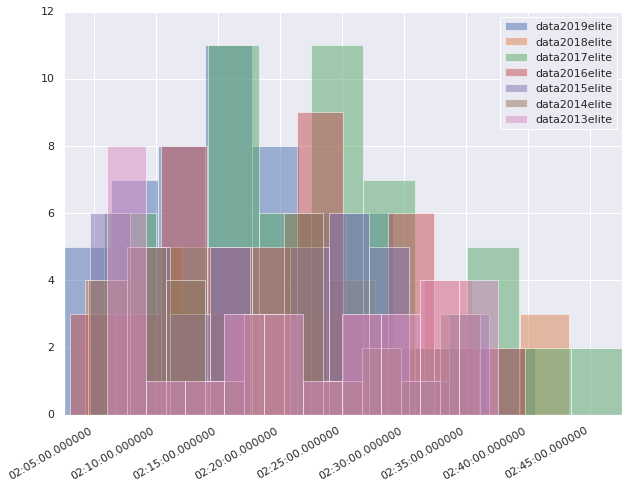

In [ ]:
finishTimeColumn = 'Finish Split'
statusColumn = 'Status'

# Elite data
fig, ax = plt.subplots(figsize=(10,8))
for dataset in dataFrameList[:7]:
  finishedData = eval(dataset)[eval(dataset)[statusColumn] == 'Finished']
  plotData = finishedData[finishTimeColumn].dropna()
  plotData.reset_index(drop=True)
  ax.hist(plotData, alpha=0.5, label=dataset)

ax.legend(loc='upper right')
fig.autofmt_xdate()
plt.show;

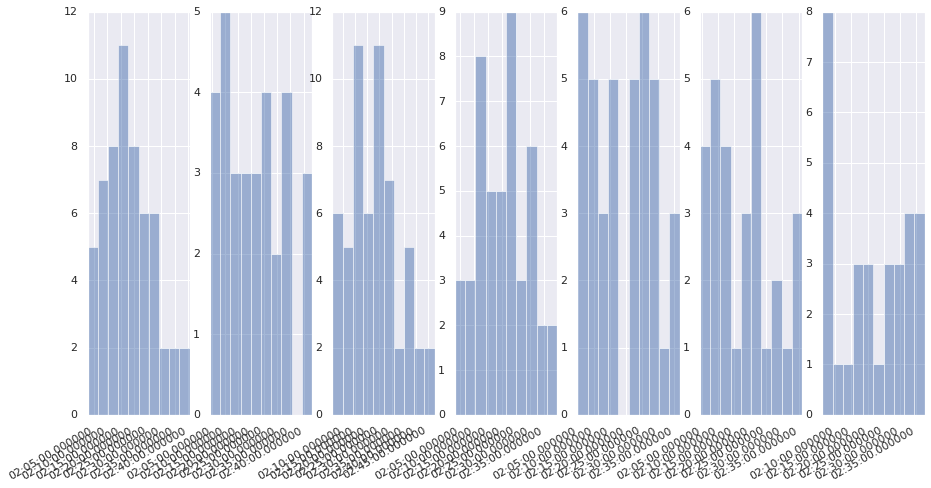

In [ ]:
finishTimeColumn = 'Finish Split'
statusColumn = 'Status'

# Elite data
fig, ax = plt.subplots(1, 7, figsize=(15,8))
for idx, dataset in enumerate(dataFrameList[:7]):
  finishedData = eval(dataset)[eval(dataset)[statusColumn] == 'Finished']
  plotData = finishedData[finishTimeColumn].dropna()
  plotData.reset_index(drop=True)
  ax[idx].hist(plotData, alpha=0.5, label=dataset)

fig.autofmt_xdate()
plt.show;

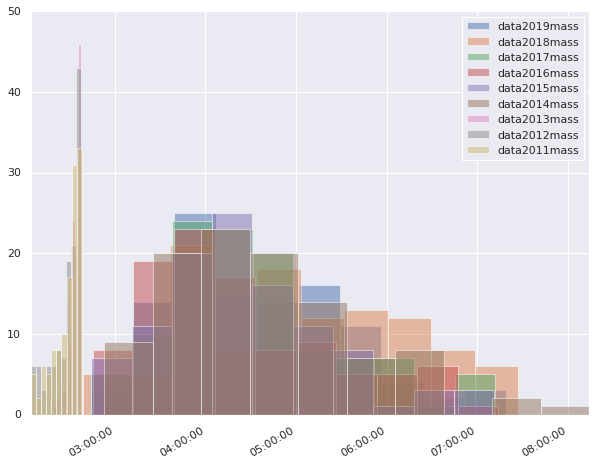

In [ ]:
# Mass data
fig, ax = plt.subplots(figsize=(10,8))
for dataset in dataFrameList[7:]:
  finishedData = eval(dataset)[eval(dataset)[statusColumn] == 'Finished']
  plotData = finishedData[finishTimeColumn].dropna()
  plotData.reset_index(drop=True)
  ax.hist(plotData, alpha=0.5, label=dataset)

ax.legend(loc='upper right')
fig.autofmt_xdate()
plt.show;

In [ ]:
#Compare the finish time correlations to half split correlations to see the pacing strategy for both elites and non elites